## Normalized to 1
## Logistic map is implemented

In [2]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
alphap = 2
beta = alphap - 1
probp = 0.75
expon = 2 * alphap - 1

In [4]:
def betadist(alpha):
    """gives a random number from beta distribution"""
    return random.betavariate(alpha,alpha)

In [5]:
def logistic_xn(n, a=2):
    x0 = random.random()
    for i in range(n):
        x1 = a * x0 * (1-x0)
        x0 = x1
        pass
    return x0

def choose_pivot(alpha):
    RR = logistic_xn(alpha)
    RRp = 1 - RR
    r = random.uniform(0, 1)
    if r < 0.5:
        return RR
    return RRp

Text(0.5, 1.0, 'beta-distribution $\\alpha=2$')

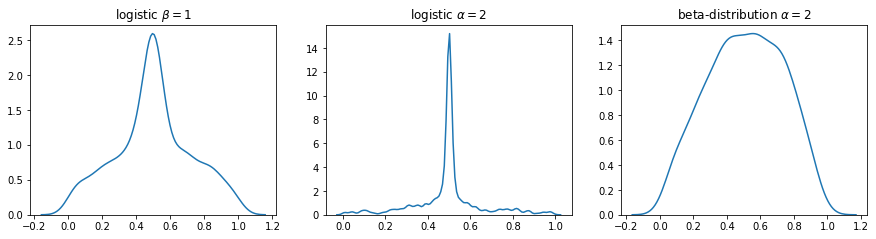

In [7]:
alpha = 2
beta = alpha - 1
fig, axes = plt.subplots(1,3, figsize=(5*3, 3.5))

rdn = [choose_pivot(beta) for i in range(1000)]
# sns.distplot(rdn)
sns.kdeplot(rdn, ax=axes[0])
axes[0].set_title(r"logistic $\beta={}$".format(beta))

rdn = [choose_pivot(alpha) for i in range(1000)]
# sns.distplot(rdn)
sns.kdeplot(rdn, ax=axes[1])
axes[1].set_title(r"logistic $\alpha={}$".format(alpha))


rdn = [betadist(alpha) for i in range(1000)]
# sns.distplot(rdn)
sns.kdeplot(rdn, ax=axes[2])
axes[2].set_title(r"beta-distribution $\alpha={}$".format(alpha))

# rdn = [np.random.beta(alpha, alpha) for i in range(1000)]
# # sns.distplot(rdn)
# sns.kdeplot(rdn, ax=axes[2])

In [91]:
def decision(probability):
    """
    decides with a given probability whether to keep the right part
    """
    if float(probability) > random.random():
        return True
    else: 
        return False

In [114]:
def splitting(left,right):
    """
    splits a given segment. left and right are endpoints of the segment
    """
    segment = right - left
    xL = segment * betadist(alphap)
    xR = segment - xL
    splitpoint = left + xL
    flag = decision(probp)
    xLp = xL**expon
    xRp = xR**expon
    change = xLp + xRp - segment**expon
    return splitpoint, flag, xLp, xRp, change

def splitting_v2(segment):
    """
    splits a given segment. left and right are endpoints of the segment
    returns : 
        xL -> length of the left segment
        xR -> length of the right segment
        flag -> keeping the right segment
        xLp, xRp -> probability(unnormalized) for being selected
        change -> change of normalization const
    """
#     xL = segment * betadist(alphap)
    xL = segment * choose_pivot(alphap - 1)
    xR = segment - xL
    flag = decision(probp)
    xLp = xL**expon
    xRp = xR**expon
    change = xLp + xRp - segment**expon
    return xL, xR, flag, xLp, xRp, change

In [115]:
def pickindex(expons, exponsum):
    """
    picks up a segment to be subsequently split
    """
    r = random.uniform(0, 1)
    sum_ = 0
    for index in range(len(expons)):
        sum_ += expons[index]/exponsum
        if sum_ < r:
            continue
        else:
            return index

In [116]:
def number_length(points,flags):
    
    N = 0
    M = 0
    
    for i in range(len(flags)):
        if flags[i]:
            N += 1
            M += points[i+1] - points[i] 
            pass
        pass
    return N, M

def number_length_v2(lengths,flags):
    
    N = 0
    M = 0
#     print(flags)
#     print(lengths)
    for i in range(len(flags)):
        if flags[i]:
            N += 1
            M += lengths[i]
            pass
        pass
    return N, M


In [117]:
def realization_value_v2(total_iteration, min_iteration, iteration_step):
    
    #points = [0.,1.]
    lengths = [1.]
    flags = [True]
    probabilities = [1.] # raw probability. not normalized
    normC = 1.0 # normalization const

    iteration_list = list(range(min_iteration, total_iteration + 1, iteration_step))
    N_realization = []
    M_realization = []
    
    for i in range(total_iteration + 1):
        
        index = pickindex(probabilities, normC)
        
        if flags[index] == True:

            xL, xR, flag, xLp, xRp, change = splitting_v2(lengths[index])
            
            lengths[index] = xL
            lengths.append(xR)
            flags.append(flag)
            probabilities[index] = xLp 
            probabilities.append(xRp)
            normC += change
            pass
        
        if i+1 in iteration_list:
            N, M = number_length_v2(lengths,flags)
            N_realization.append(N)
            M_realization.append(M)
        pass
    
    N_list = np.array(N_realization)
    M_list = np.array(M_realization)
    
    return N_list, M_list

In [108]:
# realization_value_v2(10, 2, 2)
%timeit realization_value_v2(100000, 50000, 5000)

357 ms ± 68.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [118]:
def ensemble_average(total_iteration = 1000, min_iteration = 100, iteration_step = 100, ensemble_size = 1000):

    data_points = int ((total_iteration - min_iteration)/iteration_step + 1)
    N_ensemble = np.zeros(data_points)
    M_ensemble = np.zeros(data_points)
    step = ensemble_size // 100
    for i in range(ensemble_size):
        if i % step == 0:
            print("iteration ", i)
        #N_list, M_list = realization_value(total_iteration, min_iteration, iteration_step)
        N_list, M_list = realization_value_v2(total_iteration, min_iteration, iteration_step)
        N_ensemble += N_list
        M_ensemble += M_list
        pass
    
    N_average = N_ensemble/ensemble_size
    M_average = M_ensemble/ensemble_size
    
    return N_average, M_average

In [119]:
N_average, M_average = ensemble_average(50_000, 20_000, 2_000, 1_000)

iteration  0
iteration  10
iteration  20
iteration  30
iteration  40
iteration  50
iteration  60
iteration  70
iteration  80
iteration  90
iteration  100
iteration  110
iteration  120
iteration  130
iteration  140
iteration  150
iteration  160
iteration  170
iteration  180
iteration  190
iteration  200
iteration  210
iteration  220
iteration  230
iteration  240
iteration  250
iteration  260
iteration  270
iteration  280
iteration  290
iteration  300
iteration  310
iteration  320
iteration  330
iteration  340
iteration  350
iteration  360
iteration  370
iteration  380
iteration  390
iteration  400
iteration  410
iteration  420
iteration  430
iteration  440
iteration  450
iteration  460
iteration  470
iteration  480
iteration  490
iteration  500
iteration  510
iteration  520
iteration  530
iteration  540
iteration  550
iteration  560
iteration  570
iteration  580
iteration  590
iteration  600
iteration  610
iteration  620
iteration  630
iteration  640
iteration  650
iteration  660
iterat

0.778566098780109


Text(0, 0.5, 'ln N')

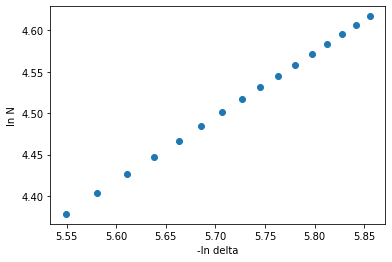

In [121]:
N_log = np.log(N_average)
minus_delta_log = N_log - np.log(M_average)
slope, intercept = np.polyfit(minus_delta_log, N_log, 1)
print(slope)
plt.plot(minus_delta_log, N_log, "o")
plt.xlabel("-ln delta")
plt.ylabel("ln N")
# plt.show()

0.7784419246258479


Text(0, 0.5, 'ln N')

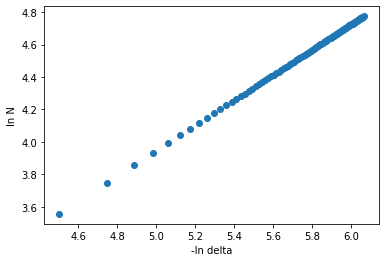

In [12]:
N_log = np.log(N_average)
minus_delta_log = N_log - np.log(M_average)
slope, intercept = np.polyfit(minus_delta_log, N_log, 1)
print(slope)
plt.plot(minus_delta_log, N_log, "o")
plt.xlabel("-ln delta")
plt.ylabel("ln N")
# plt.show()
print(0.7784419246258479)

## Idea to make it faster

1. each insert takes 5 times more time than just assigining value. because "insert" method inserts in some ranodm position 
2. same is not true for append. appends always inserts at the end
3. so we only need to replace insert method with something else
4. if we can find something where ordering or sequencing does not matter, this will be resolved
5. instead of points we can work with segment length only. and corresponding flag and probability. Like the table bellow

| length  | flag  | probability  |
|---|---|---|
|   |   |   |
|   |   |   |  
|   |   |   | 

7. Probably this can be made even faster by not using append in each iteration

# Performance
| method  | time
|---|---|
realization_value    | $1.19$ s
realization_value_v2 | $241$ ms

realization_value_v2 is $~5$ times faster

# Results
1. slope with realization_value    $0.779388458353189$
2. slope with realization_value_v2 $0.7841054354669876$


# Comments

logistic map works only for small $\alpha$

$\beta = \alpha - 1$

if $\beta = 1$ then slope is $0.778566098780109$ with logistic map

if $\alpha = 2$ then slope is $0.7784419246258479$ with beta distribution